# RKN

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.visualize import load_experiment
# exps = [f"experiments/80G_3ch_ampbcstep_M41_rho8_p{x/10:.1f}"  for x in range(11, 31)]
exps = [f"experiments/80G_3ch_frepbc_M41_rho1_ol40_strides41_p{x/10:.1f}"  for x in range(11, 31)]
datas = {name:load_experiment(name) for name in exps}

print('RMPS:', datas['experiments/80G_3ch_frepbc_M41_rho1_ol40_strides41_p1.1']['model'].rmps())

p = np.array([x/10  for x in range(11, 31)])
Q =  np.array([datas[key]['Metric/Qsq']['value'][-1] for key in exps])

plt.figure(dpi=200, figsize=(6, 4))
plt.plot(p, Q, '-o')
plt.xlabel('p')
plt.ylabel('Q')
plt.title('Q vs p')
plt.text(2, Q[p==2][0], f'Q = {Q[p==2][0]}')
plt.text(p[np.argmax(Q)], np.max(Q), f' max Q = {Q[np.argmax(Q)]}')
plt.grid()
plt.show()

RMPS: 8086.8807658764545


# Q-P curve

experiments/80G_3ch_pbc_M41_rho2 rmps: 5316
experiments/80G_3ch_pbc_M41_rho2 Best Q afctor:  8.312249488376136
experiments/80G_3ch_frepbc_M41_rho1_ol40_strides161 rmps: 5116.890966209366
experiments/80G_3ch_frepbc_M41_rho1_ol40_strides161 Best Q afctor:  8.523959290756387


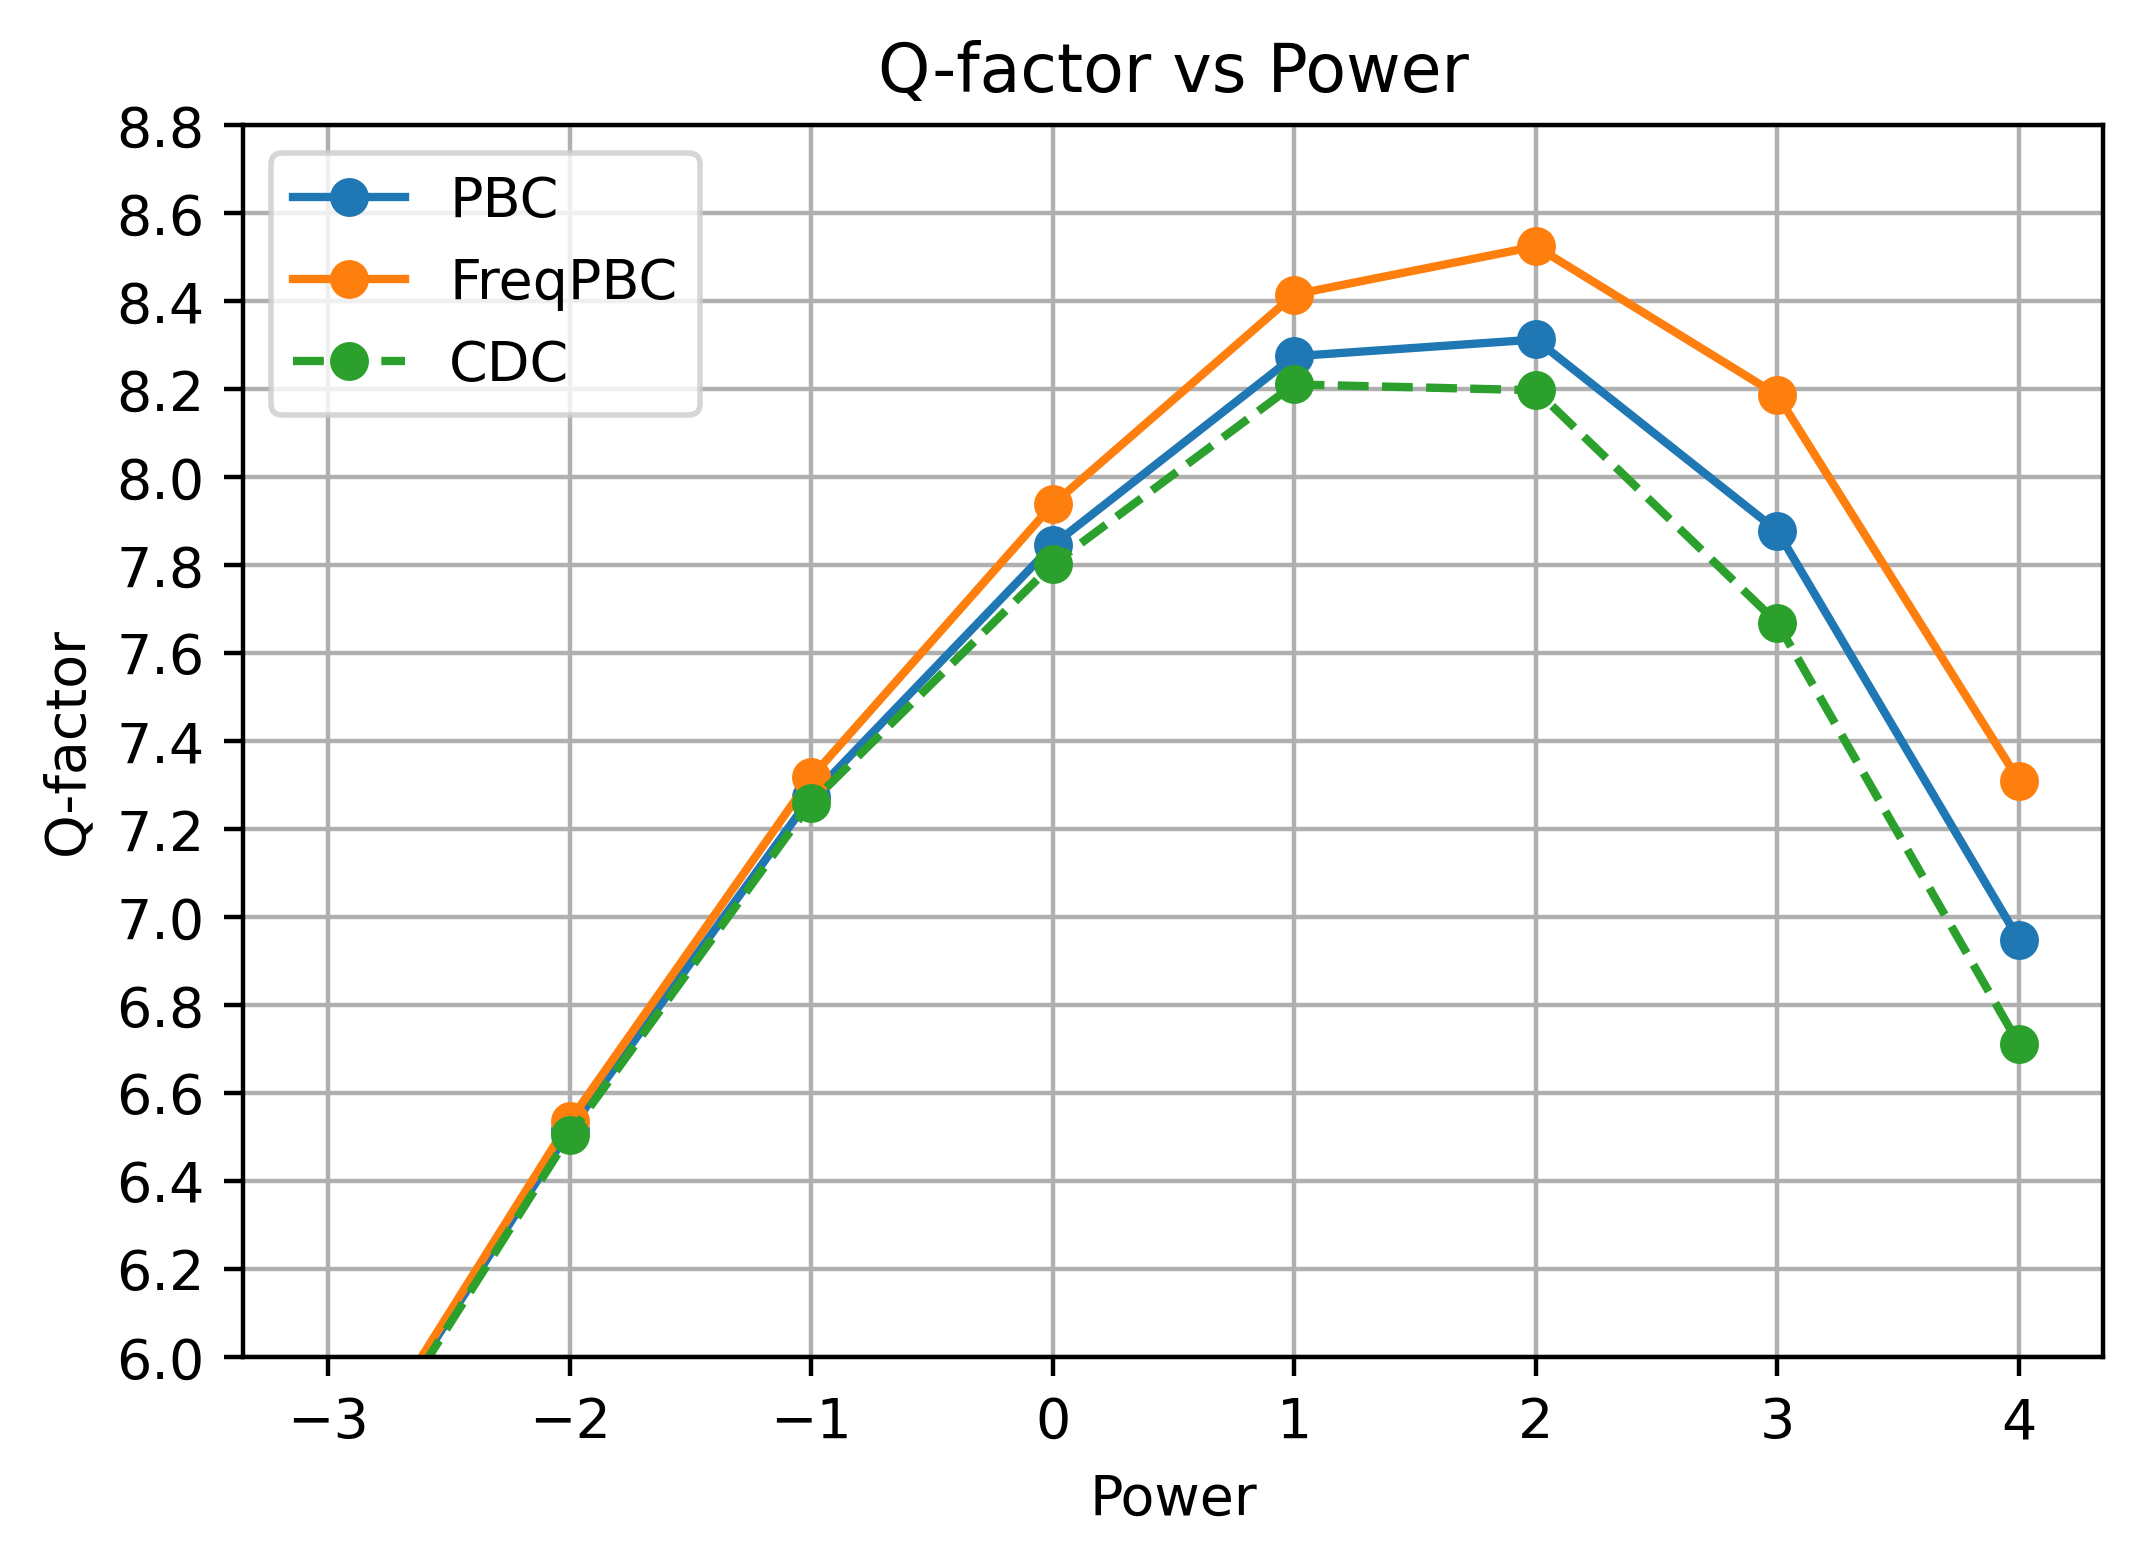

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
from scripts.visualize import load_experiment, load_baseline
import pkufiber as pf

paths = [
        f'experiments/80G_3ch_pbc_M41_rho2',
        'experiments/80G_3ch_frepbc_M41_rho1_ol40_strides161',
        # 'experiments/80G_3ch_frepbc_M41_rho1_ol40_strides161',
        # 'experiments/80G_3ch_frepbc_M81_rho1_ol160_strides161',
        # 'experiments/80G_3ch_frepbc_M41_rho1_ol40_strides321',
        # 'experiments/80G_3ch_fdbp_v1',
        # 'experiments/80G_3ch_pbcdbp_v13'
        # 'experiments/80G_3ch_pbcdbp_v2',
        # 'experiments/80G_3ch_pbcdbp_v4',
        # 'experiments/80G_3ch_pbcdbp_v6',
        # 'experiments/80G_3ch_ampbcstep_M401_rho1',
        # 'experiments/80G_3ch_ampbcstep_M41_rho2',
        # 'experiments/80G_3ch_pbc_M161_rho2',
        # 'experiments/80G_3ch_pbc_M41_rho2',
        # 'experiments/80G_3ch_frepbc_M201_ol200_rho1_strides201',
        # 'experiments/80G_3ch_frepbc_M81_rho1_ol80_strides321',
        ]
lab = lambda x: 'FreqPBC' if 'frepbc' in x else 'PBC'

results = {path: load_experiment(path) for path in paths}
labels = {path: lab(path) for path in paths}


plt.figure(dpi=400, figsize=(6, 4))
for key, result in results.items():
    qfactor, power = result['qfactor_power']
    print(f'{key} rmps:', result['model'].rmps())
    plt.plot(power, qfactor, '-o', label=labels[key])
    print(key, 'Best Q afctor: ', np.max(qfactor))

# CDC
cdc, power = load_baseline('configs/dsp/test_eq.yaml', 'CDC')
plt.plot(power, cdc, '--o', label='CDC')


plt.grid()
plt.xlabel('Power')
plt.ylabel('Q-factor')
plt.ylim(6, 8.8)
plt.title('Q-factor vs Power')
plt.yticks(np.arange(6, 8.8, 0.2))
plt.legend(loc='upper left')

In [37]:
for x in cdc:
    print(0, x, f'{x:.2f}')

0 5.638932989407933 5.64
0 6.504278267825484 6.50
0 7.25975824437569 7.26
0 7.801342174654591 7.80
0 8.210200975397191 8.21
0 8.196919497631525 8.20
0 7.668169416144108 7.67
0 6.7106088340186645 6.71


In [34]:
for key, result in results.items():
    qfactor, power = result['qfactor_power']
    for i in range(len(power)):
        print(f'{qfactor[i]:.2f}')
    print(f'{key} rmps:', result['model'].rmps())

5.66
6.52
7.27
7.84
8.27
8.31
7.88
6.95
experiments/80G_3ch_pbc_M41_rho2 rmps: 5316
5.66
6.54
7.32
7.94
8.41
8.52
8.19
7.31
experiments/80G_3ch_frepbc_M41_rho1_ol40_strides161 rmps: 5116.890966209366


In [9]:
## constellation
# import pkufiber as pf 
# y = np.load(paths[0] + '/results/y_2dBm.npy')
# x = np.load(paths[0] + '/results/x_2dBm.npy')
# pf.show_symb(y[0:5000], x[0:5000], s=1) 

In [25]:
from pkufiber.dsp.nonlinear_compensation.rmps import  rmps_edc 
import matplotlib.pyplot as plt

N = np.linspace(10, 20000, 100)
R = [rmps_edc(n) for n in N]

/home/xiaoxinyu/miniforge3/envs/pkufiber/lib/python3.9/site-packages/torch/nn/init.py:452: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


experiments/80G_3ch_pbcdbp_v12 8.83363795391348
experiments/80G_3ch_pbcdbp_v13 8.97182425912603
experiments/80G_3ch_pbcdbp_v14 8.967447103203812
experiments/80G_3ch_pbcdbp_v15 8.974960038262223
experiments/80G_3ch_pbcdbp_v16 8.979993642794355


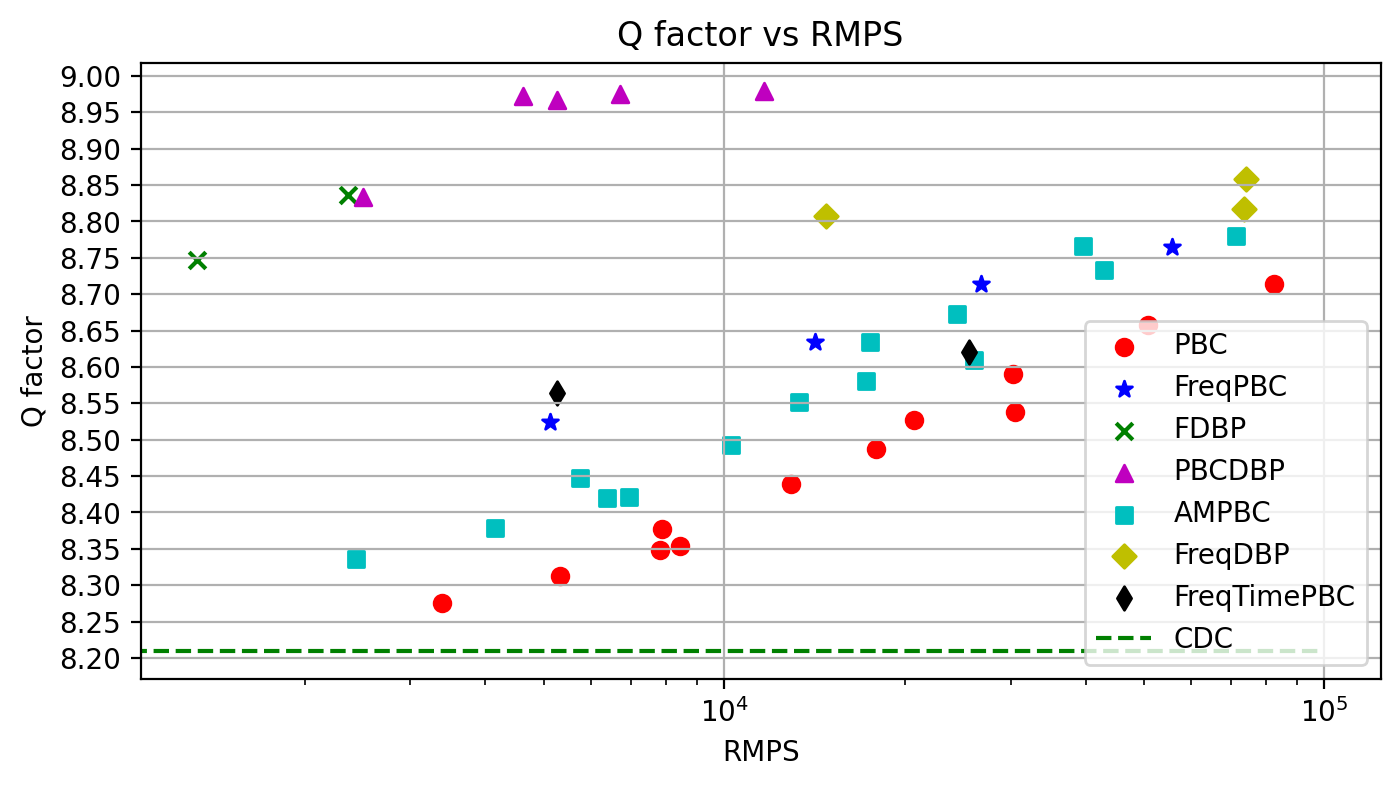

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from scripts.visualize import load_experiment, load_baseline
import pkufiber as pf

pbc_path = [f'experiments/80G_3ch_pbc_M{M}_rho{rho}' for M in [41, 81, 161] for rho in [1, 2, 4, 8]] 
ampbc_path = [f'experiments/80G_3ch_ampbcstep_M{M}_rho{rho}' for M in [41, 81, 161] for rho in [1, 2, 4, 8]] + [
    'experiments/80G_3ch_ampbc_M401_rho1_v1',
    'experiments/80G_3ch_ampbc_M401_rho0.5_v1',
]
frepbc_path = [
                'experiments/80G_3ch_frepbc_M41_rho1_ol40_strides161',
                'experiments/80G_3ch_frepbc_M201_ol200_rho1_strides201',
                'experiments/80G_3ch_frepbc_M81_rho1_ol80_strides161',
                'experiments/80G_3ch_frepbc_M161_rho1_ol80_strides321',
                ] 
dbp_path = [
            'experiments/80G_3ch_fdbp_v1',
            # 'experiments/80G_3ch_fdbp_v3',
            # 'experiments/80G_3ch_fdbp_v4',
            # 'experiments/80G_3ch_fdbp_v5',
            'experiments/80G_3ch_fdbp_v7',
            # 'experiments/80G_3ch_pbcdbp_v1',
            # 'experiments/80G_3ch_pbcdbp_v2',
            # 'experiments/80G_3ch_pbcdbp_v8',
            # 'experiments/80G_3ch_pbcdbp_v10',
            # 'experiments/80G_3ch_pbcdbp_v6',
            'experiments/80G_3ch_pbcdbp_v12',
            'experiments/80G_3ch_pbcdbp_v13',
            'experiments/80G_3ch_pbcdbp_v14',
             'experiments/80G_3ch_pbcdbp_v15',
              'experiments/80G_3ch_pbcdbp_v16',
        ]
paths =  pbc_path + frepbc_path + dbp_path + ampbc_path + ['experiments/80G_3ch_freqdbp_test_v1',
                                                            'experiments/80G_3ch_freqdbp_test_v3',
                                                             'experiments/80G_3ch_freqdbp_test_v5', 
                                                             'experiments/80G_3ch_freqtimepbc_v3',
                                                             'experiments/80G_3ch_freqtimepbc_v4']

results = {path: load_experiment(path) for path in paths}

import matplotlib.pyplot as plt
import numpy as np

plt.figure(dpi=200, figsize=(8, 4))

# 初始化两个空列表用于存储 scatter 对象
scatter_frepbc = None
scatter_other = None
scatter_fdbp = None
scatter_pbcdbp = None
scatter_ampbcstep = None
scatter_freqdbp = None
scatter_freqtime = None

cdc, power = load_baseline('configs/dsp/test_eq.yaml', 'CDC')

for key, res in results.items():
    rmps = results[key]['model'].rmps() 
    Qmax = np.max(results[key]['qfactor_power'][0])

    if 'frepbc' in key:
        scatter_frepbc = plt.scatter(rmps, Qmax,c='b', marker='*', label='FreqPBC') if scatter_frepbc is None else plt.scatter(rmps, Qmax,c='b', marker='*')
    elif 'freqtime' in key:
        scatter_freqtime = plt.scatter(rmps, Qmax,c='k', marker='d', label='FreqTimePBC') if scatter_freqtime is None else plt.scatter(rmps, Qmax,c='k', marker='d')
    elif 'freqdbp' in key:
        scatter_freqdbp = plt.scatter(rmps, Qmax,c='y', marker='D', label='FreqDBP') if scatter_freqdbp is None else plt.scatter(rmps, Qmax,c='y', marker='D')
    elif 'fdbp' in key:
        scatter_fdbp = plt.scatter(rmps, Qmax,c='g', marker='x', label='FDBP') if scatter_fdbp is None else plt.scatter(rmps, Qmax,c='g', marker='x')
    elif 'pbcdbp' in key:
        scatter_pbcdbp = plt.scatter(rmps, Qmax,c='m', marker='^', label='PBCDBP') if scatter_pbcdbp is None else plt.scatter(rmps, Qmax,c='m', marker='^')
        print(key, Qmax)
    elif 'ampbc' in key:
        scatter_ampbcstep = plt.scatter(rmps, Qmax,c='c', marker='s', label='AMPBC') if scatter_ampbcstep is None else plt.scatter(rmps, Qmax,c='c', marker='s')
    else:
        scatter_other = plt.scatter(rmps, Qmax,c='r', marker='o', label='PBC') if scatter_other is None else plt.scatter(rmps, Qmax,c='r', marker='o')

# plot a CDC 水平线
plt.plot([0, 1e5], [np.max(cdc), np.max(cdc)], '--', c='g', label='CDC')

plt.xlabel('RMPS')
plt.ylabel('Q factor')
plt.yticks(np.arange(8.2, 9, 0.05))
plt.xscale('log')
plt.legend(loc='lower right')
plt.title('Q factor vs RMPS')
plt.grid()
plt.show()


In [7]:
results['experiments/80G_3ch_pbcdbp_v1']['model'].rmps()

7228.1354417650155

In [8]:
results['experiments/80G_3ch_fdbp_v1']['model'].rmps()

1322.7408844584097

In [6]:
results['experiments/80G_3ch_pbcdbp_v13']['model'].rmps()

7167.4745307289995

In [1]:
import pkufiber.dsp.nonlinear_compensation as nl
from pkufiber.dsp.nonlinear_compensation.rmps import rmps_edc

In [5]:
nl.EqAMPBC(M=161, rho=8).rmps()

71170.99363990009

In [10]:
nl.EqPBC(M=401, rho=0.1, index_type='reduce-1').rmps()

10668

In [ ]:
nl.EqFrePBC(M=41, rho=0.1, overlaps=40, strides=101).rmps()

In [ ]:
nl.FDBP(Nmodes=2, step=5, dtaps=2001, ntaps=401).rmps()

In [118]:
nl.PbcDBP(Nmodes=2, step=10, dtaps=2001, ntaps=101, pbc_rho=0.04).rmps()

3354.4214117770116

In [9]:
nl.FreqDBP(Nmodes=2, step=5, M=41, rho=0.1).rmps(strides=101)

5540.905401581266

# Freq PBC

model30.pth loaded.
model30.pth loaded.
model40.pth loaded.
model30.pth loaded.


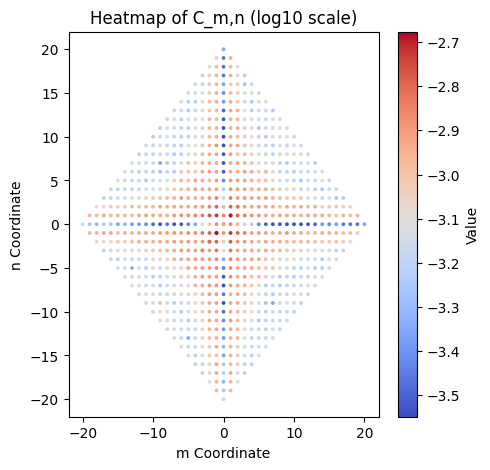

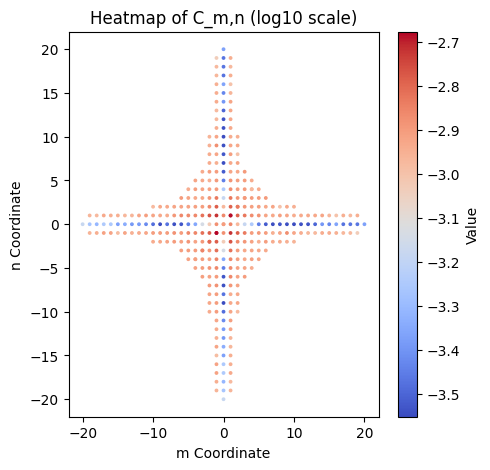

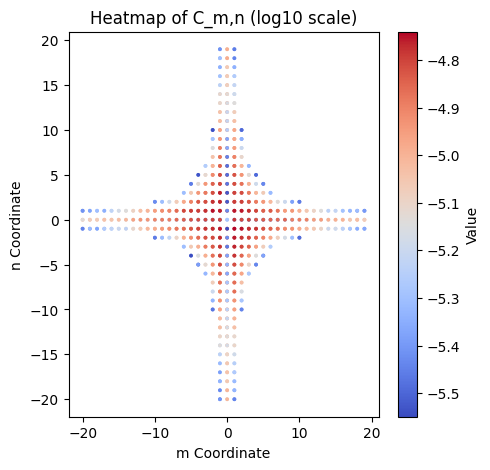

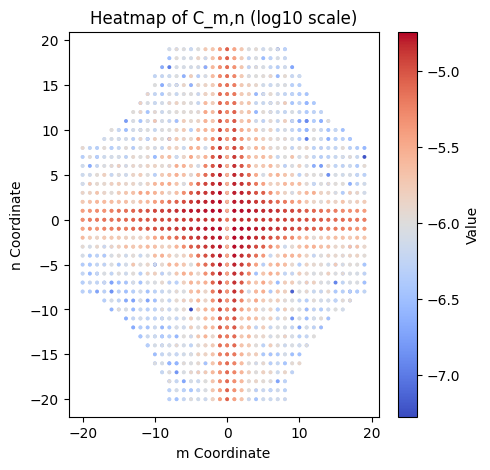

In [38]:
from scripts.test_eq import  load_latest_model 
import pkufiber.dsp.nonlinear_compensation.pbc as pbc

def weight2tensor(fc):
    c = fc.real.weight + 1j * fc.imag.weight
    return c.cpu().detach().squeeze()

model = load_latest_model('experiments/80G_3ch_pbc_M41_rho8')
c = weight2tensor(model.PBC.nn[0])
pbc.show_pbc(c, model.PBC.features.index)

model = load_latest_model('experiments/80G_3ch_pbc_M41_rho1')
c = weight2tensor(model.PBC.nn[0])
pbc.show_pbc(c, model.PBC.features.index)

model = load_latest_model('experiments/80G_3ch_frepbc_M41_rho1_ol40_strides161')
c = weight2tensor(model.fc)
pbc.show_pbc(c, model.index)

model = load_latest_model('experiments/80G_3ch_frepbc_M41_rho8_ol40_strides161')
c = weight2tensor(model.fc)
pbc.show_pbc(c, model.index)

In [24]:
import pkufiber as pf
import pkufiber.dsp.nonlinear_compensation as nl 
import torch

# net = nl.PbcDBP(2, step=1, dtaps=10001, ntaps=101, pbc_rho=0.04)
net = nl.FreqDBP(2, step=1, overlaps=2100)

In [26]:
sig = pf.TorchSignal(val=torch.randn(10, 20000, 2) + 1j, t=pf.TorchTime(0,0,2))
task_info = torch.randn(10, 4)

In [27]:
net(sig, task_info)

TorchSignal(val: tensor with torch.Size([10, 9900, 2]), cpu, t:TorchTime(start=5050, stop=-5050, sps=2))

In [9]:
import torch 


x = torch.rand(5, 1000, 2)

x.unfold(1, 10, 1).shape

torch.Size([5, 991, 2, 10])

In [35]:
import pkufiber as pf 

data = pf.data.FiberDataset(path='data/40G_3ch_batch40.h5', Tx_window=True)

y,x,z = data[0]

In [34]:
def map_symbols_to_indices(X, Y = pf.QAM(16).const()):

    # 扩展X的维度，使其能够与Y进行广播运算
    X_expanded = X.unsqueeze(-1)  # [B, T, 1]
    
    # 计算X中每个符号与Y中符号的距离，并找到最小距离的索引
    distances = torch.abs(X_expanded - Y)  # [B, T, N]
    indices = torch.argmin(distances, dim=-1)  # [B, T]
    
    return indices


In [11]:
"""
    NN equalizer.
"""

import torch.nn as nn, torch, numpy as np, torch


import torch.nn.functional as F


def stft_with_padding(signal, n_fft, hop_length, win_length, dim=-1):
    """
    对张量的指定维度进行 STFT，并自动处理填充问题。
    :param signal: 输入信号张量
    :param n_fft: FFT 点数
    :param hop_length: 窗口滑动步长
    :param win_length: 窗口长度
    :param dim: 指定要进行 STFT 的维度
    :return: 计算后的 STFT 结果和填充后的信号长度
    """
    original_shape = signal.shape
    # 将指定维度移到最后
    signal = signal.transpose(dim, -1)
    L = signal.shape[-1]
    
    # 计算所需的填充长度
    pad_amount = n_fft - hop_length  # 根据 hop_length 和 n_fft 的关系来决定填充
    padded_signal = F.pad(signal, (0, pad_amount))  # 在信号末尾进行填充

    # 计算STFT
    stft_result = torch.stft(padded_signal, n_fft=n_fft, hop_length=hop_length, win_length=win_length, return_complex=True, center=True)

    # 记录填充后的信号长度
    padded_length = padded_signal.shape[-1]
    
    return stft_result

def istft_with_unpadding(stft_result, original_length, n_fft, hop_length, win_length, original_shape, dim=-1):
    """
    对 STFT 结果进行逆变换，并裁剪到原始长度，同时处理指定维度。
    :param stft_result: STFT 结果
    :param original_length: 原始信号的长度
    :param n_fft: FFT 点数
    :param hop_length: 窗口滑动步长
    :param win_length: 窗口长度
    :param original_shape: 原始信号的形状
    :param dim: 指定的 STFT 操作维度
    :return: 逆变换后的信号，裁剪至原始长度
    """
    # 进行逆STFT
    reconstructed_signal = torch.istft(stft_result, n_fft=n_fft, hop_length=hop_length, win_length=win_length, length=original_length, center=True)

    # 将重建后的信号裁剪到与原始信号相同的长度
    reconstructed_signal = reconstructed_signal[..., :original_length]

    # 将指定的维度移回原来的位置
    reconstructed_signal = reconstructed_signal.transpose(dim, -1).reshape(original_shape)

    return reconstructed_signal



In [10]:
x = torch.rand(5, 1000) + 1j

stft_with_padding(x, n_fft=256, hop_length=128, win_length=256, dim=-1)

tensor([[[ 1.2639e+02+2.5600e+02j,  1.2717e+02+2.5600e+02j,
           1.2720e+02+2.5600e+02j,  ...,
           1.2720e+02+2.5600e+02j,  1.1516e+02+2.3200e+02j,
           5.3385e+01+1.0400e+02j],
         [ 2.0775e+00-1.3669e-07j, -3.6569e+00-6.9244e-01j,
           4.7992e+00-4.8589e-02j,  ...,
           3.3963e+00-5.9789e-01j, -2.5219e+00-2.3111e+01j,
           8.5289e+01-1.5809e+01j],
         [ 5.3053e-01+3.7580e-08j,  2.7966e+00-2.9391e+00j,
           4.1142e+00-2.4885e+00j,  ...,
           1.3923e+00-4.3300e+00j, -4.4933e-01-2.5612e+01j,
           5.8190e-01-2.4925e+01j],
         ...,
         [ 4.0369e+00-1.1040e-07j, -1.3180e+00-7.7122e-01j,
           2.0751e+00+9.3458e-01j,  ...,
           5.6093e-01+2.6274e+00j, -2.2826e+01-2.7368e+00j,
          -4.7765e+00+1.6674e+01j],
         [ 5.3053e-01-3.0130e-08j,  2.7966e+00+2.9391e+00j,
           4.1142e+00+2.4885e+00j,  ...,
           1.3923e+00+4.3300e+00j, -2.6520e+01-1.1406e+01j,
          -2.5489e+01-1.2092e+01j],
 